<a href="https://colab.research.google.com/github/jej0312/DM_TA/blob/main/8_ANN_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN (Artificial Neural Network; 신경망)
- TA: 전은지 (Eunji Jeon)  
- Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
- 문의: `jej_0312_@naver.com`

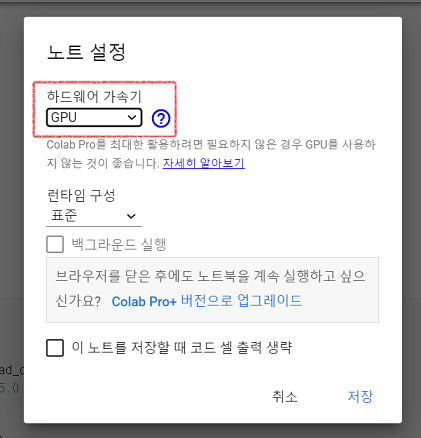

- Import
  - Keras
  - Pytorch
- [용어](https://losskatsu.github.io/machine-learning/epoch-batch/#2-batch-size%EC%9D%98-%EC%9D%98%EB%AF%B8)
    - epoch: 전체 트레이닝 셋이 신경망을 통과한 횟수
    - batch: 전체 트레이닝 데이터 셋을 여러 작은 그룹을 나누었을 때 batch size는 하나의 소그룹에 속하는 데이터 수

> 전체 2000 개의 데이터가 있고, epochs = 20, batch_size = 500이라고 가정: 1 epoch는 각 데이터의 size가 500인 batch가 들어간 네 번의 iteration으로 나누어짐.전체 데이터셋에 대해서는 20 번의 학습이 이루어졌으며, iteration 기준으로 보자면 총 80 번의 학습이 이루어진 것.

- [Activation](https://ganghee-lee.tistory.com/32)
  - 노드에 들어오는 값들을 곧바로 다음 레이어로 전달하지 않고, 주로 비선형 함수(활성화 함수(Activation Function))를 통과시켜 전달 ([참고](https://wooono.tistory.com/209))
  - sigmoid, tanh, ReLU, softmax, ...
  - "Hidden layer에서 어떤 활성화 함수를 사용할지 모르겠으면 ReLU를 사용하면 된다" - Andrew ng

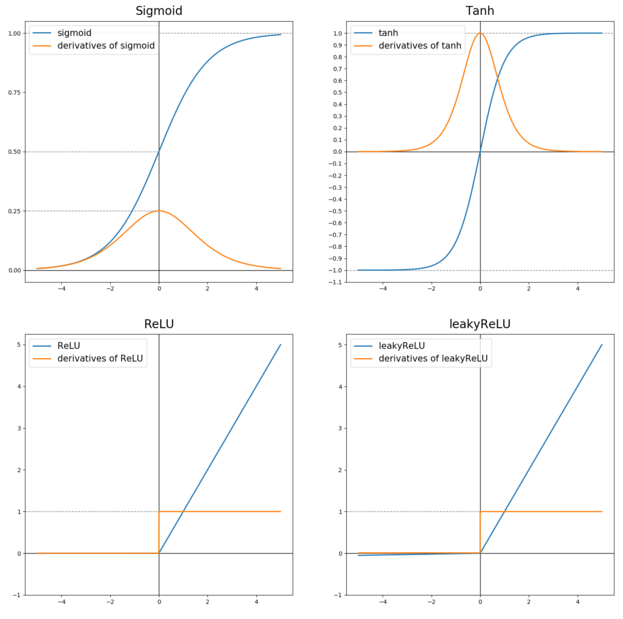

- Layer
  - Flatten layer: 1차원 자료로 바꿔주는 layer
  - Dense layer (Fully Connected layer): 이전 계층의 모든 뉴런과 결합된 형태의 layer (pytorch에서는 Linear layer)
  - Dropout layer: 네트워크가 과적합되는 경우를 방지하기 위해서 만들어진 레이어로 학습 과정에서 무작위로 뉴런의 집합을 제거
- [Optimizer](https://keras.io/api/optimizers/)
  - sgd, RMSprop, adam, ...
  - Adam을 가장 자주 씀
  - [참고](https://velog.io/@yookyungkho/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%80-%EC%A0%95%EB%B3%B5%EA%B8%B0%EB%B6%80%EC%A0%9C-CS231n-Lecture7-Review)

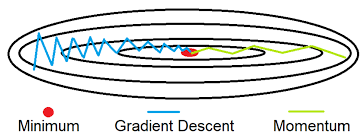

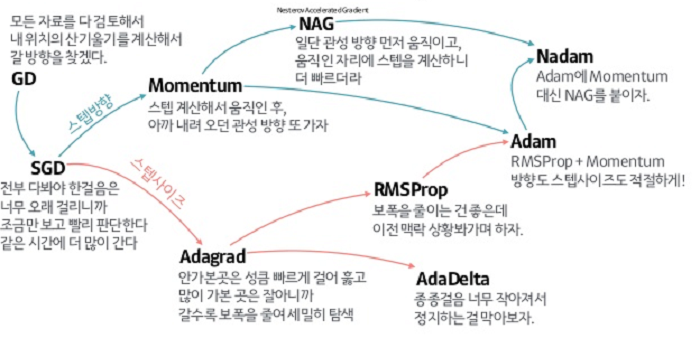

- [Loss](https://keras.io/api/losses/)
  - Regression: MSE, RSMSE, MAPE, ...
  - Classification: binary crossentropy, categorical crossentropy
  - train(훈련)에서 weight를 update하는 용도, [metrics](https://keras.io/api/metrics/regression_metrics/)은 validation을 통한 성능 평가용

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2929 - accuracy: 0.9158
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1418 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1077 - accuracy: 0.9663
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0876 - accuracy: 0.9731
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0727 - accuracy: 0.9782


[0.07267661392688751, 0.9782000184059143]

# Regression

In [ ]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/jej0312/DM_TA/main/data/kc_house_data.csv')
dataset
# https://www.kaggle.com/harlfoxem/housesalesprediction
# This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
# information link: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


- date; Date sold
- price; Sale price
- bedrooms; Number of bedrooms
- bathrooms; Number of bathrooms
- sqft_liv; Size of living area in square feet
- sqft_lot; Size of the lot in square feet
- floors; Number of floors
- waterfront;‘1’ if the property has a waterfront, ‘0’ if not.
- view; An index from 0 to 4 of how good the view of the property was
- condition; Condition of the house, ranked from 1 to 5
- grade; Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: KingCounty
- sqft_above; Square feet above ground
- sqft_basmt; Square feet below ground
- yr_built; Year built
- yr_renov; Year renovated. ‘0’ if never renovated
- zipcode; 5 digit zip code
- lat; Latitude
- long; Longitude
- squft_liv15; Average size of interior housing living space for the closest 15 houses, in square feet
- squft_lot15; Average size of land lots for the closest 15 houses, in square feet

In [ ]:
dataset.shape

(21613, 21)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
dataset.isnull().sum() #결측치확인

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
dataset_new = dataset.copy().loc[:,['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_living15', 'sqft_lot15', 
                                    'price']] # 일부만 선택

In [ ]:
dataset_new

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_living15,sqft_lot15,price
0,3,1.00,1180,1.0,1180,1340,5650,221900.0
1,3,2.25,2570,2.0,2170,1690,7639,538000.0
2,2,1.00,770,1.0,770,2720,8062,180000.0
3,4,3.00,1960,1.0,1050,1360,5000,604000.0
4,3,2.00,1680,1.0,1680,1800,7503,510000.0
...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,1530,1530,1509,360000.0
21609,4,2.50,2310,2.0,2310,1830,7200,400000.0
21610,2,0.75,1020,2.0,1020,1020,2007,402101.0
21611,3,2.50,1600,2.0,1600,1410,1287,400000.0


In [ ]:
# Features와 target 나누기
features = dataset_new[dataset_new.columns[:-1]]
target = dataset_new[dataset_new.columns[-1]]

In [ ]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    features, target, test_size = 0.2, random_state = 2021)

In [ ]:
print(train_features.shape)
print(train_target.shape)
print(test_features.shape)
print(test_target.shape)

(17290, 7)
(17290,)
(4323, 7)
(4323,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# Network 구조 형성
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Model structure
model = models.Sequential() # ANN 형성
## node수는 보통 8, 16, 32, 64, 128 등을 많이 사용
model.add(layers.Dense(16, activation = 'relu', input_shape=(train_features.shape[1],))) # (number of nodes, activation function, input shape)
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(1)) # Output layer - regression은 node가 1개

# Optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Loss Function
model.compile(optimizer=adam, loss='mse', metrics=['mape'])
# 다음과 같이도 이용 가능
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Callback
## 콜백함수 참고 링크
# https://deep-deep-deep.tistory.com/1
# https://deep-deep-deep.tistory.com/55
# https://deep-deep-deep.tistory.com/56
# https://deep-deep-deep.tistory.com/53

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True) # Early stopping
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001) # learning rate 관련

# Modeling
reg_history = model.fit(train_features, train_target, epochs=300, batch_size=1024, validation_split=0.2,
                       callbacks=[es,lr])

Epoch 1/300
14/14 [==============================] - 2s 112ms/step - loss: 440655227562.6667 - mape: 99.9914 - val_loss: 412681371648.0000 - val_mape: 99.8826
Epoch 2/300
14/14 [==============================] - 0s 5ms/step - loss: 441322753228.8000 - mape: 99.7261 - val_loss: 406399090688.0000 - val_mape: 98.8277
Epoch 3/300
14/14 [==============================] - 0s 5ms/step - loss: 415034135893.3333 - mape: 98.1030 - val_loss: 383530270720.0000 - val_mape: 94.8224
Epoch 4/300
14/14 [==============================] - 0s 5ms/step - loss: 382888651434.6667 - mape: 92.7725 - val_loss: 329393864704.0000 - val_mape: 84.5910
Epoch 5/300
14/14 [==============================] - 0s 4ms/step - loss: 308011661175.4667 - mape: 80.1683 - val_loss: 239411478528.0000 - val_mape: 66.0805
Epoch 6/300
14/14 [==============================] - 0s 4ms/step - loss: 216849144217.6000 - mape: 60.4643 - val_loss: 144177872896.0000 - val_mape: 48.6200
Epoch 7/300
14/14 [==============================] - 0s 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


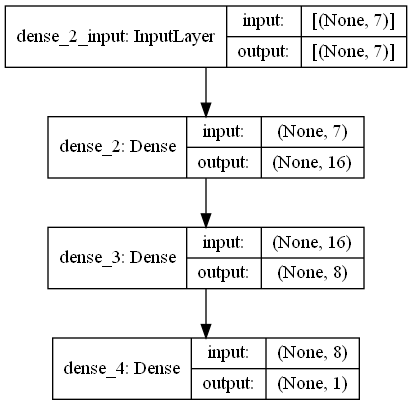

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='network_regression_model_shapes.png', show_shapes=True)

# 참고 링크: https://twinstarinfo.blogspot.com/2019/05/pydot-install.html

In [ ]:
model.get_weights() # 순서대로, (input layer -> hidden layer1 -> hidden layer2 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[-3.72907609e-01, -7.73600340e-01, -7.40830183e+00,
         -3.46868306e-01,  5.15410328e+00, -6.63862181e+00,
         -7.67465889e-01,  1.04001827e+01, -3.84614527e-01,
         -7.57913399e+00, -1.71733594e+00, -9.65200615e+00,
         -1.75314026e+01,  6.38884497e+00, -6.66218758e+00,
         -2.79927492e+00],
        [-3.04552794e-01, -9.26651359e-01,  4.93891525e+00,
          6.54766321e-01, -1.22760260e+00,  8.12296677e+00,
         -5.42189538e-01, -8.52932072e+00,  9.20188606e-01,
          5.72828817e+00,  7.44147524e-02,  6.11483669e+00,
          8.84659863e+00, -5.55000019e+00, -2.81679239e-02,
         -2.28267908e+00],
        [-6.61315799e-01,  2.14943905e+01,  2.69934349e+01,
         -4.15738249e+00, -2.59589100e+01,  4.17892075e+01,
          2.09776325e+01, -8.07302666e+00, -4.30686903e+00,
          2.64865322e+01,  2.07502003e+01,  2.16120319e+01,
          2.32044487e+01, -1.19419861e+01,  2.19587612e+01,
          2.19506130e+01],
        [-3.7215561

In [ ]:
pd.DataFrame(model.get_weights()[0])
# weight와 bias 확인
## 0: input layer -> hidden layer1 의 weight
## 1: input layer -> hidden layer1 의 bias
## 2: hidden layer1 -> hidden layer2 의 weight
## 3: hidden layer1 -> hidden layer2 의 bias
## 4: hidden layer2 -> output layer 의 weight
## 5: hidden layer2 -> output layer 의 bias

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.372908,-0.773600,-7.408302,-0.346868,5.154103,-6.638622,-0.767466,10.400183,-0.384615,-7.579134,-1.717336,-9.652006,-17.531403,6.388845,-6.662188,-2.799275
1,-0.304553,-0.926651,4.938915,0.654766,-1.227603,8.122967,-0.542190,-8.529321,0.920189,5.728288,0.074415,6.114837,8.846599,-5.550000,-0.028168,-2.282679
2,-0.661316,21.494390,26.993435,-4.157382,-25.958910,41.789207,20.977633,-8.073027,-4.306869,26.486532,20.750200,21.612032,23.204449,-11.941986,21.958761,21.950613
3,-3.721556,-5.919954,5.453341,-4.291659,-11.311871,8.302159,-5.140869,30.231371,-4.831429,2.889483,-2.878313,-6.732401,-31.462202,15.029830,-2.716159,3.769760
4,-20.442667,1.308420,2.039448,-19.399145,0.727355,-7.402297,2.917070,-12.900872,-17.618202,2.448430,7.027152,5.936754,5.573349,-15.696167,5.470545,3.333612
5,18.629763,4.718888,14.767061,19.248569,12.887674,-24.629765,4.829851,-6.936310,17.418621,15.341691,1.799524,-1.214761,13.621016,8.493811,1.187606,10.432775
6,-9.292506,-38.273079,7.110518,-3.300250,2.440373,-51.537476,-29.042452,1.360186,-2.889453,8.267411,-3.054495,-2.845180,0.198521,1.304229,-1.977279,1.462423


In [ ]:
reg_history_dict = reg_history.history
reg_history_dict.keys()

dict_keys(['loss', 'mape', 'val_loss', 'val_mape', 'lr'])

In [ ]:
reg_history.history

{'loss': [430558674944.0,
  427877826560.0,
  414610194432.0,
  376696766464.0,
  301660635136.0,
  200317878272.0,
  125674061824.0,
  108142034944.0,
  101492457472.0,
  95433662464.0,
  90111524864.0,
  85256241152.0,
  80749084672.0,
  76709421056.0,
  73234964480.0,
  70529507328.0,
  68782612480.0,
  67587297280.0,
  66687307776.0,
  65974292480.0,
  65328812032.0,
  64775008256.0,
  64284581888.0,
  63836864512.0,
  63429324800.0,
  63087570944.0,
  62726615040.0,
  62408351744.0,
  62108811264.0,
  61919993856.0,
  61626507264.0,
  61400342528.0,
  61229207552.0,
  61015089152.0,
  60850147328.0,
  60814000128.0,
  60607303680.0,
  60389474304.0,
  60184932352.0,
  60087287808.0,
  59935625216.0,
  59811692544.0,
  59669962752.0,
  59598430208.0,
  59432140800.0,
  59334520832.0,
  59213021184.0,
  59085148160.0,
  59020898304.0,
  58971910144.0,
  58751111168.0,
  58740469760.0,
  58602778624.0,
  58641575936.0,
  58556383232.0,
  58390376448.0,
  58338017280.0,
  58216128512.

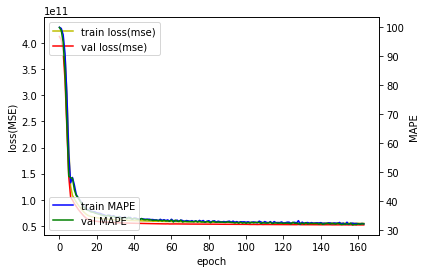

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(reg_history.history['loss'],'y',label='train loss(mse)')
loss_ax.plot(reg_history.history['val_loss'],'r',label='val loss(mse)')
acc_ax.plot(reg_history.history['mape'],'b',label='train MAPE')
acc_ax.plot(reg_history.history['val_mape'],'g',label='val MAPE')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')
acc_ax.set_ylabel('MAPE')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

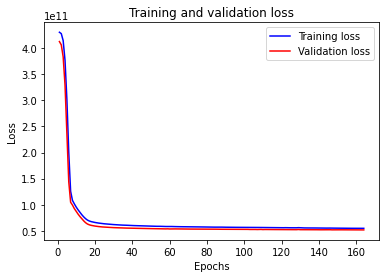

In [ ]:
# 훈련과 검증 손실 (loss)
import matplotlib.pyplot as plt
reg_history_dict = reg_history.history
loss = reg_history_dict['loss']
val_loss = reg_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') # ‘b’는 실선으로, 'bo'는 점으로 나옴
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

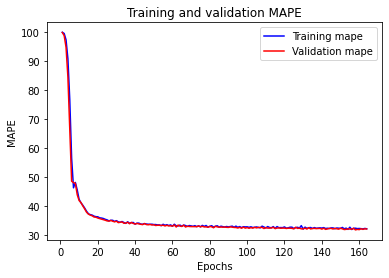

In [ ]:
# 훈련과 검증 MAPE (metric)
plt.clf() # 그래프를 초기화합니다.
train_metric = reg_history_dict['mape']
val_metric = reg_history_dict['val_mape']

plt.plot(epochs, train_metric, 'b', label='Training mape')
plt.plot(epochs, val_metric, label='Validation mape', color='red')
plt.title('Training and validation MAPE')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()

plt.show()

In [ ]:
# 예측
y_pred = model.predict(test_features)

In [ ]:
y_pred

array([[ 370112.6 ],
       [1011917.06],
       [ 433898.4 ],
       ...,
       [ 395005.97],
       [1309950.5 ],
       [ 992236.6 ]], dtype=float32)

In [ ]:
# 성능평가
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
print('test R squared: %.3f' % r2_score(test_target, y_pred))
print('test MSE: %.3f' % mean_squared_error(test_target,y_pred))
print('tset MAPE: %.3f' % mean_absolute_percentage_error(test_target,y_pred))
# 참고: https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20metrics#module-sklearn.metrics

test R squared: 0.582
test MSE: 56881472279.863
tset MAPE: 0.323


# Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


train: 60000개의 이미지가 있고, 한 이미지가 28x28개의 pixels로 구성되어 있다.

test: 10000개의 이미지가 있고, 한 이미지가 28x28개의 pixels로 구성되어 있다.

(각 픽셀은 0~255 중 한 숫자를 가지는데, 255에 가까울수록 흰색을 의미)

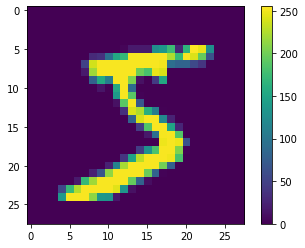

In [ ]:
# 어떤 이미지인지 확인
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

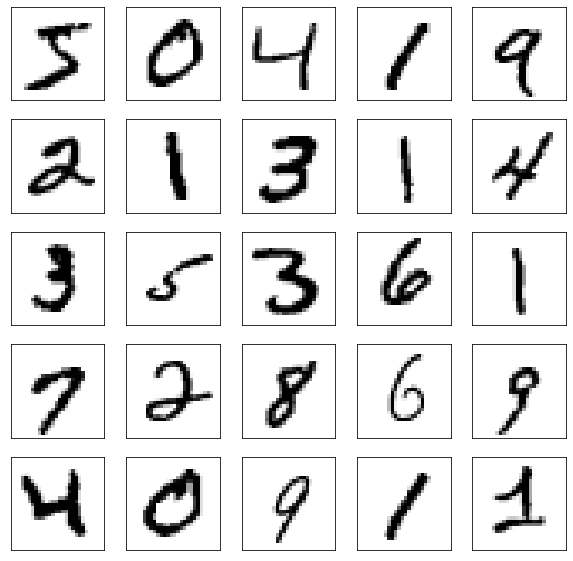

In [ ]:
# 일부 숫자들 확인
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
# input data의 형태를 3D array에서 2D array (즉, matrix) 형태로 변경
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [ ]:
# Input scaling
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [ ]:
# One-hot Encoding
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# 원래의 종속변수를 담고 있는 array는 벡터, 즉 각 원소가 한개 이미지의 종속변수 값 (0 ~ 9) 을 취함

In [ ]:
print(test_labels_one_hot.shape)
print(test_labels[0])
print(test_labels_one_hot[0]) 

(10000, 10)
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

tf.random.set_seed(312)

# Network Structure
network = models.Sequential() 
network.add(layers.Dense(32, activation = 'relu', input_shape=(28*28,))) # Hidden layer & Input layer (28x28개의 input을 받음)
network.add(layers.Dense(8, activation = 'relu')) # Hidden layer
network.add(layers.Dense(10, activation = 'softmax')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용

# Optimizer
from tensorflow.keras import optimizers
network.compile(optimizer=optimizers.RMSprop(lr=0.01),
               loss='categorical_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

# Callback
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=0.001)
## early stopping에서 monitor='val_accuracy'로 할 경우 min_delta = 0.001을 요소에 추가하는 것도 한 방안
## 단, scale이 0~1과 같이 정해진 accuracy같은 경우에 한하여 min_delta 사용 바람

# Modeling
cls_history = network.fit(train_images, train_labels_one_hot, epochs=300, batch_size=1024, validation_split=0.2,
                         callbacks=[es, lr])

Epoch 1/300
47/47 [==============================] - 1s 9ms/step - loss: 1.9847 - accuracy: 0.2794 - val_loss: 0.4761 - val_accuracy: 0.8752
Epoch 2/300
47/47 [==============================] - 0s 7ms/step - loss: 0.5002 - accuracy: 0.8552 - val_loss: 0.3219 - val_accuracy: 0.9083
Epoch 3/300
47/47 [==============================] - 0s 6ms/step - loss: 0.3256 - accuracy: 0.9080 - val_loss: 0.3227 - val_accuracy: 0.9032
Epoch 4/300
47/47 [==============================] - 0s 6ms/step - loss: 0.2654 - accuracy: 0.9210 - val_loss: 0.2120 - val_accuracy: 0.9402
Epoch 5/300
47/47 [==============================] - 0s 6ms/step - loss: 0.2302 - accuracy: 0.9327 - val_loss: 0.2169 - val_accuracy: 0.9380
Epoch 6/300
47/47 [==============================] - 0s 6ms/step - loss: 0.1942 - accuracy: 0.9436 - val_loss: 0.1883 - val_accuracy: 0.9491
Epoch 7/300
47/47 [==============================] - 0s 6ms/step - loss: 0.1774 - accuracy: 0.9475 - val_loss: 0.2221 - val_accuracy: 0.9336
Epoch 8/300
4

In [ ]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                90        
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________


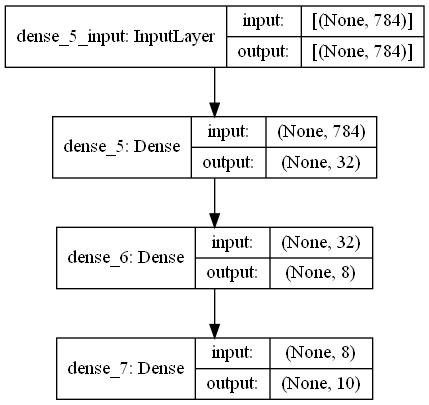

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(network, to_file='network_classification_model_shapes.png', show_shapes=True)

In [ ]:
network.get_weights()
#순서대로, (input layer -> hidden layer1 -> output layer) step별로 weight와 bias 값을 보여줌

[array([[ 0.01255281, -0.03958989, -0.02309429, ..., -0.04072332,
          0.06385765, -0.01381921],
        [ 0.00214591,  0.03357299,  0.06083503, ...,  0.01501311,
          0.06368599,  0.07188702],
        [-0.01924979,  0.02048904,  0.04070166, ..., -0.04734326,
          0.07094867, -0.03604262],
        ...,
        [-0.05643506,  0.03958071,  0.06687572, ...,  0.0001424 ,
         -0.05151775,  0.05889157],
        [-0.05447666, -0.08264917, -0.03220022, ..., -0.0770645 ,
         -0.00509472, -0.01218699],
        [ 0.04489527,  0.08318741,  0.03264646, ..., -0.00155666,
         -0.06556559, -0.04434505]], dtype=float32),
 array([-0.08436055, -0.03162254,  0.34628358,  0.419131  , -0.13659698,
        -0.09467942,  0.18722555, -0.0316167 , -0.29548806,  0.40920419,
        -0.09136711, -0.18685736, -0.03280419,  0.15315014, -0.03162143,
         0.42148593,  0.2070174 , -0.0356604 ,  0.02623221, -0.03162229,
         0.23844306, -0.12036575, -0.17913108,  0.10015673, -0.062

In [ ]:
pd.DataFrame(network.get_weights()[0]) # input -> hidden의 weights

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.012553,-0.039590,-0.023094,-0.011284,0.020911,-0.021276,0.030984,0.081252,-0.041336,-0.028756,...,0.083769,-0.028327,0.069921,-0.034418,-0.001660,0.016817,0.017408,-0.040723,0.063858,-0.013819
1,0.002146,0.033573,0.060835,-0.072945,0.019659,0.029949,-0.084746,0.029649,0.020775,0.012430,...,0.045728,0.019126,-0.071481,0.029716,0.075084,-0.012095,-0.083233,0.015013,0.063686,0.071887
2,-0.019250,0.020489,0.040702,-0.000689,-0.068028,-0.072953,0.068786,-0.064957,-0.038435,0.046285,...,-0.064958,-0.023173,-0.081749,0.011494,0.070404,0.082755,0.024953,-0.047343,0.070949,-0.036043
3,-0.050085,-0.073793,0.051704,-0.073050,0.022443,-0.024670,-0.069371,-0.002280,0.068739,0.077638,...,0.041915,-0.070094,-0.068959,-0.004804,0.082888,0.007120,-0.081418,0.068177,-0.068706,-0.077910
4,-0.071834,-0.037642,0.079724,-0.075287,-0.069439,0.004077,-0.053881,-0.063413,-0.082871,-0.076708,...,-0.081452,0.069481,0.061309,-0.069432,-0.084707,-0.057423,-0.013900,0.078455,-0.063130,0.031926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-0.009687,0.019623,-0.249398,0.117811,0.332397,0.092103,-0.020525,0.025246,-0.016591,0.024156,...,-0.170585,0.122586,-0.155162,-0.007824,-0.036869,0.817755,0.050395,-0.799553,0.168264,0.029459
780,0.046558,-0.008792,-0.000222,0.021376,0.036432,0.012680,0.002019,-0.046524,-0.076038,-0.018219,...,0.038165,-0.039340,-0.067869,0.013521,-0.074348,-0.068011,0.064885,-0.003408,0.069087,0.005872
781,-0.056435,0.039581,0.066876,0.077317,0.066437,-0.038827,0.039527,0.074057,0.009214,-0.081482,...,0.013389,-0.085104,-0.057690,-0.000980,-0.024504,0.045100,0.031079,0.000142,-0.051518,0.058892
782,-0.054477,-0.082649,-0.032200,-0.079429,0.037634,-0.028775,-0.012823,-0.019655,-0.040172,-0.019911,...,0.046158,-0.058819,0.025890,-0.020542,0.080961,-0.076993,0.023265,-0.077064,-0.005095,-0.012187


In [ ]:
pd.DataFrame(network.get_weights()[1]) # input -> hidden의 bias

,0
0,-0.084361
1,-0.031623
2,0.346284
3,0.419131
4,-0.136597
5,-0.094679
6,0.187226
7,-0.031617
8,-0.295488
9,0.409204


In [ ]:
pd.DataFrame(network.get_weights()[2]) # hidden -> hidden의 weights

,0,1,2,3,4,5,6,7
0,0.261605,0.465547,-0.238973,0.781171,-0.109330,-1.105007,-0.268807,-0.533526
1,-0.102578,0.349167,0.296233,0.230521,0.193475,0.255682,0.239427,-0.026813
2,0.649692,-0.421498,-0.117041,0.536671,-0.908008,-0.021070,0.047126,-0.267905
3,0.440462,-0.132709,0.702586,0.012996,0.079708,0.383189,0.473290,-0.201522
4,0.027637,0.526495,-0.086429,0.723231,0.285566,-0.777758,-0.198139,-0.199710
5,0.162947,0.015545,-0.601391,-0.099912,-1.048735,0.007959,1.026409,-0.482209
6,-0.200267,-0.388349,0.657777,0.104848,-0.969781,-0.043182,-0.400567,0.073995
7,-0.305145,0.100566,-0.180554,-0.081394,-0.044216,-0.221830,-0.118561,-0.200375
8,-0.159552,0.615506,0.216155,-0.673451,-0.693385,0.468273,-0.022368,-0.442195
9,-0.027418,-0.031385,-0.085787,0.331991,-0.102220,0.340989,0.012059,0.738948


In [ ]:
pd.DataFrame(network.get_weights()[3]) # hidden -> hidden의 bias

,0
0,0.002812
1,-0.147717
2,0.354442
3,0.010875
4,0.313123
5,0.295049
6,0.272445
7,0.431785


In [ ]:
cls_history_dict = cls_history.history
cls_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
cls_history.history

{'loss': [1.4651426076889038,
  0.46182140707969666,
  0.31675660610198975,
  0.25526097416877747,
  0.22246742248535156,
  0.19447894394397736,
  0.18058040738105774,
  0.16478240489959717,
  0.1534639447927475,
  0.14450012147426605,
  0.13697567582130432,
  0.12717492878437042,
  0.12282261252403259,
  0.1138954684138298,
  0.1107502430677414,
  0.10704351961612701,
  0.10266784578561783,
  0.09993084520101547,
  0.0969555452466011,
  0.09366282820701599,
  0.08937142789363861,
  0.08835442364215851,
  0.0822255089879036,
  0.08170242607593536,
  0.07994117587804794,
  0.07817532122135162,
  0.07764061540365219,
  0.07247316837310791,
  0.07255396991968155],
 'accuracy': [0.4816666543483734,
  0.8663958311080933,
  0.9091041684150696,
  0.9256874918937683,
  0.9340624809265137,
  0.9426458477973938,
  0.9463124871253967,
  0.9509999752044678,
  0.9538958072662354,
  0.9567291736602783,
  0.958020806312561,
  0.9619374871253967,
  0.9629166722297668,
  0.9644583463668823,
  0.9653750

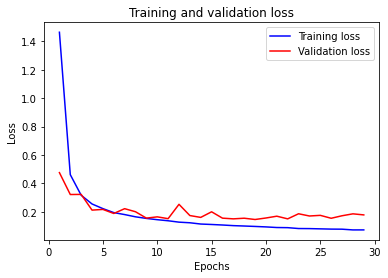

In [ ]:
# 훈련과 검증 손실
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
val_loss = cls_history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss', color='red') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

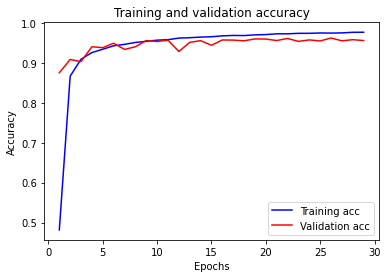

In [ ]:
# 훈련과 검증 정확도
plt.clf() 
acc = cls_history_dict['accuracy']
val_acc = cls_history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc', color='red')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels_one_hot)
print('test loss:', test_loss)
print('test_accuracy:', test_acc)

313/313 [==============================] - 0s 758us/step - loss: 0.1345 - accuracy: 0.9606
test loss: 0.134525865316391
test_accuracy: 0.9606000185012817


# Appendix

# SOM Practice

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('fa_data_bfi.csv')
dataset

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
0,-0.439830,0.103897,-1.216713,-0.696215,-1.519449
1,0.084369,0.559311,-0.601521,-0.189341,-0.248384
2,0.520534,0.318235,0.025646,-0.751136,0.204503
3,-0.197064,0.057696,-1.019263,0.064286,-1.029492
4,-0.329835,0.408754,-0.058843,-0.820454,-0.691042
...,...,...,...,...,...
2431,1.308046,-1.152403,-0.104197,-1.146411,0.412042
2432,0.732472,0.252206,-0.587511,-0.317781,1.025564
2433,-0.223267,0.721169,0.787110,-1.058480,0.925103
2434,0.920520,0.749337,0.070953,-2.135145,0.673460


In [ ]:
print(dataset.shape)

(2436, 5)


In [ ]:
dataset.describe() # 기초통계량

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
count,2.436000e+03,2.436000e+03,2.436000e+03,2.436000e+03,2.436000e+03
mean,1.895947e-17,-1.166737e-17,2.333474e-17,4.448184e-17,-3.646053e-17
std,9.236532e-01,8.771326e-01,8.628192e-01,8.445489e-01,8.271759e-01
min,-2.900034e+00,-2.964398e+00,-3.086888e+00,-3.611214e+00,-3.260500e+00
25%,-7.210416e-01,-5.274507e-01,-5.533678e-01,-4.973700e-01,-5.699871e-01
50%,-5.976721e-02,7.642778e-02,7.095942e-02,1.261594e-01,2.820526e-02
75%,6.603891e-01,6.468802e-01,6.344018e-01,6.057907e-01,6.193536e-01
max,2.738694e+00,2.461448e+00,1.941907e+00,2.179653e+00,2.011314e+00


In [ ]:
X = dataset.iloc[:, :].values

In [ ]:
# !pip install MiniSom

  Using cached MiniSom-2.2.9.tar.gz (8.1 kB)
  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8603 sha256=78de989f97c4defec2b07baaf513a094ca2bbbb1d0789341736eafff6ab14500
  Stored in directory: c:\users\hwwoo\appdata\local\pip\cache\wheels\b2\b8\f9\08876fa31be00070d6a60686b9842e044d1a9b471e8d6772d4
Successfully built MiniSom


Parameters :

- x and y = dimensions of the grid

- input_len = No of features in input dataset

- sigma = radius of the neighbourhoods

- learning_rate = By how much the weiights are updated in each iteration. Higher the value faster the algorithm runs.

In [ ]:
from minisom import MiniSom
som = MiniSom(x=3 ,y=3 ,sigma=1.0 ,learning_rate=0.1 ,input_len=5)
# Initializing the weights
som.random_weights_init(X) # random_weights_init 으로 각 node 들을 초기화
som.train_random(data=X ,num_iteration=100) # train_random 메서드로 SOM 학습을 시작

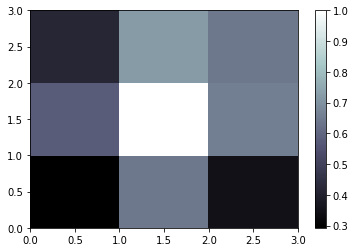

In [ ]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

show()
# node 에 최근접한 data point 들이 많을수록 짙게, 적을수록 옅게 표시

In [ ]:
som.distance_map() # Each cell is the normalised sum of the distances between a neuron and its neighbours.
# 아래 결과는 좌표상으로는 다음과 같음
# (1,1), (1,2), (1,3)
# (2,1), (2,2), (2,3)
# (3,1), (3,2), (3,3)

## (1,3)이 그림에서 가장 우측 아래, (3,3)이 가장 우측상단 의미

array([[0.29285751, 0.57717181, 0.41235619],
       [0.64070274, 1.        , 0.72020191],
       [0.34859047, 0.65386486, 0.64061567]])

In [ ]:
mapping = som.win_map(X)

In [ ]:
type(mapping)

collections.defaultdict

In [ ]:
np.array(mapping[0,0]) # competitive map에서 특정 좌표에 존재하는 관측치들이 각각 가지는 feature의 값

array([[ 2.26673182e-01,  1.07862703e+00,  1.31271017e+00,
        -1.18515852e-01,  3.00929650e-01],
       [-6.49210683e-01,  7.23217655e-01,  8.61668319e-01,
        -1.57010447e-01,  6.12093902e-01],
       [-1.82038976e-02,  1.24236018e+00,  8.67823724e-01,
        -1.04006007e+00,  1.76105730e-01],
       [ 5.14268058e-01,  3.52885899e-01,  1.06239146e+00,
         8.33359482e-01,  1.23877815e+00],
       [ 7.30664343e-02,  7.94932209e-01,  1.87170261e-01,
        -7.38720586e-01,  6.20219222e-01],
       [ 5.24522097e-01,  1.29747347e+00,  1.05474909e+00,
        -1.03865675e+00,  1.00763891e+00],
       [ 2.42059365e-01,  9.14126941e-01,  1.19089261e+00,
        -6.59677435e-02,  7.19053824e-01],
       [-6.40557616e-01,  1.42592722e+00,  4.32179955e-01,
        -1.88840839e+00,  4.97250439e-01],
       [ 3.97906329e-01,  6.35891926e-01, -8.65389864e-02,
         4.79777427e-01,  5.04895012e-01],
       [ 7.76182265e-01,  4.51136177e-01,  7.30212113e-01,
         2.92874383e-02

In [ ]:
np.array(mapping[0,0]).shape # competitive map이 3x3이므로, mapping[i,j]에서 i와 j는 0~2까지의 숫자를 넣을 수 있음
# (해당 좌표에 포함된 sample 수, feature 개수)

(168, 5)

In [ ]:
pd.DataFrame(mapping[0,0])

,0,1,2,3,4
0,0.226673,1.078627,1.312710,-0.118516,0.300930
1,-0.649211,0.723218,0.861668,-0.157010,0.612094
2,-0.018204,1.242360,0.867824,-1.040060,0.176106
3,0.514268,0.352886,1.062391,0.833359,1.238778
4,0.073066,0.794932,0.187170,-0.738721,0.620219
...,...,...,...,...,...
163,-0.193953,0.356430,1.118133,0.036046,0.497052
164,-0.032249,0.984047,1.046707,-0.853321,0.727716
165,1.144534,1.325192,0.626019,0.101881,1.480198
166,0.827423,1.188910,1.037375,0.612881,0.769660


In [ ]:
for i in range(0,3):
    for j in range(0,3):
        print("(", i+1, ",", j+1, ")", "allocated obseravations:", np.array(mapping[i,j]).shape[0])

( 1 , 1 ) allocated obseravations: 168
( 1 , 2 ) allocated obseravations: 194
( 1 , 3 ) allocated obseravations: 214
( 2 , 1 ) allocated obseravations: 422
( 2 , 2 ) allocated obseravations: 286
( 2 , 3 ) allocated obseravations: 397
( 3 , 1 ) allocated obseravations: 195
( 3 , 2 ) allocated obseravations: 453
( 3 , 3 ) allocated obseravations: 107


In [ ]:
sum_mapping = 0
for i in range(0,3):
    for j in range(0,3):
        sum_mapping = sum_mapping + np.array(mapping[i,j]).shape[0]
print("# of observations=", sum_mapping)

# of observations= 2436


In [ ]:
pd.DataFrame(mapping[0,0]).describe() # competitive map에서 특정 좌표의 기초통계량

,0,1,2,3,4
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,-0.101829,0.850091,0.732887,-0.295699,0.685445
std,0.617326,0.477848,0.551554,0.739264,0.494753
min,-1.839635,-0.514626,-1.554359,-2.971719,-0.517493
25%,-0.487791,0.533420,0.376751,-0.755814,0.346881
50%,-0.092942,0.837927,0.859611,-0.120548,0.688642
75%,0.276299,1.201756,1.160091,0.211462,1.052740
max,1.249096,1.826873,1.685540,1.068610,1.895334


In [ ]:
pd.DataFrame(mapping[0,0]).describe().loc['mean']

0   -0.101829
1    0.850091
2    0.732887
3   -0.295699
4    0.685445
Name: mean, dtype: float64

In [ ]:
pd.DataFrame(mapping[0,0]).describe().loc['std']

0    0.617326
1    0.477848
2    0.551554
3    0.739264
4    0.494753
Name: std, dtype: float64

In [ ]:
pd.DataFrame(mapping[0,0]).describe().loc['50%']

0   -0.092942
1    0.837927
2    0.859611
3   -0.120548
4    0.688642
Name: 50%, dtype: float64

In [ ]:
mean_list = []
std_list = []
median_list = []
index_list = []
for i in range(0, 3):
    for j in range(0, 3):
        mean_list.append(pd.DataFrame(mapping[0,0]).describe().loc['mean'])
        std_list.append(pd.DataFrame(mapping[0,0]).describe().loc['std'])
        median_list.append(pd.DataFrame(mapping[0,0]).describe().loc['50%'])
        index_list.append('(' + str(i) + ',' + str(j) + ')' )

In [ ]:
pd.DataFrame(mean_list, index =index_list) # competitive map에서 각 좌표별 feature의 평균값

,0,1,2,3,4
"(0,0)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(0,1)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(0,2)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(1,0)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(1,1)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(1,2)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(2,0)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(2,1)",-0.101829,0.850091,0.732887,-0.295699,0.685445
"(2,2)",-0.101829,0.850091,0.732887,-0.295699,0.685445


In [ ]:
pd.DataFrame(median_list, index =index_list) # competitive map에서 각 좌표별 feature의 중앙값

,0,1,2,3,4
"(0,0)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(0,1)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(0,2)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(1,0)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(1,1)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(1,2)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(2,0)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(2,1)",-0.092942,0.837927,0.859611,-0.120548,0.688642
"(2,2)",-0.092942,0.837927,0.859611,-0.120548,0.688642


In [ ]:
pd.DataFrame(std_list, index =index_list) # competitive map에서 각 좌표별 feature의 표준편차

,0,1,2,3,4
"(0,0)",0.617326,0.477848,0.551554,0.739264,0.494753
"(0,1)",0.617326,0.477848,0.551554,0.739264,0.494753
"(0,2)",0.617326,0.477848,0.551554,0.739264,0.494753
"(1,0)",0.617326,0.477848,0.551554,0.739264,0.494753
"(1,1)",0.617326,0.477848,0.551554,0.739264,0.494753
"(1,2)",0.617326,0.477848,0.551554,0.739264,0.494753
"(2,0)",0.617326,0.477848,0.551554,0.739264,0.494753
"(2,1)",0.617326,0.477848,0.551554,0.739264,0.494753
"(2,2)",0.617326,0.477848,0.551554,0.739264,0.494753


## SOM Code 뜯어보기

In [ ]:
import inspect
 
print(inspect.getsource(MiniSom))

class MiniSom(object):
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5,
                 decay_function=asymptotic_decay,
                 neighborhood_function='gaussian', topology='rectangular',
                 activation_distance='euclidean', random_seed=None):
        """Initializes a Self Organizing Maps.

        A rule of thumb to set the size of the grid for a dimensionality
        reduction task is that it should contain 5*sqrt(N) neurons
        where N is the number of samples in the dataset to analyze.

        E.g. if your dataset has 150 samples, 5*sqrt(150) = 61.23
        hence a map 8-by-8 should perform well.

        Parameters
        ----------
        x : int
            x dimension of the SOM.

        y : int
            y dimension of the SOM.

        input_len : int
            Number of the elements of the vectors in input.

        sigma : float, optional (default=1.0)
            Spread of the neighborhood function, needs to be adequ

In [ ]:
# SOM Code
from math import sqrt

from numpy import (array, unravel_index, nditer, linalg, random, subtract,
                   power, exp, pi, zeros, arange, outer, meshgrid, dot)
from collections import defaultdict
from warnings import warn


"""
    Minimalistic implementation of the Self Organizing Maps (SOM).
"""


def fast_norm(x):
    """Returns norm-2 of a 1-D numpy array.

    * faster than linalg.norm in case of 1-D arrays (numpy 1.9.2rc1).
    """
    return sqrt(dot(x, x.T))


class MiniSom(object):
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5, decay_function=None, random_seed=None):
        """
            Initializes a Self Organizing Maps.

            x,y - dimensions of the SOM

            input_len - number of the elements of the vectors in input

            sigma - spread of the neighborhood function (Gaussian), needs to be adequate to the dimensions of the map.
            (at the iteration t we have sigma(t) = sigma / (1 + t/T) where T is #num_iteration/2)

            learning_rate - initial learning rate
            (at the iteration t we have learning_rate(t) = learning_rate / (1 + t/T) where T is #num_iteration/2)

            decay_function, function that reduces learning_rate and sigma at each iteration
                            default function: lambda x,current_iteration,max_iter: x/(1+current_iteration/max_iter)

            random_seed, random seed to use.
        """
        if sigma >= x/2.0 or sigma >= y/2.0:
            warn('Warning: sigma is too high for the dimension of the map.')
        if random_seed:
            self.random_generator = random.RandomState(random_seed)
        else:
            self.random_generator = random.RandomState(random_seed)
        if decay_function:
            self._decay_function = decay_function
        else:
            self._decay_function = lambda x, t, max_iter: x/(1+t/max_iter)
        self.learning_rate = learning_rate
        self.sigma = sigma
        self.weights = self.random_generator.rand(x,y,input_len)*2-1 # random initialization
        for i in range(x):
            for j in range(y):
                self.weights[i,j] = self.weights[i,j] / fast_norm(self.weights[i,j]) # normalization
        self.activation_map = zeros((x,y))
        self.neigx = arange(x)
        self.neigy = arange(y) # used to evaluate the neighborhood function
        self.neighborhood = self.gaussian

    def _activate(self, x):
        """ Updates matrix activation_map, in this matrix the element i,j is the response of the neuron i,j to x """
        s = subtract(x, self.weights) # x - w
        it = nditer(self.activation_map, flags=['multi_index'])
        while not it.finished:
            self.activation_map[it.multi_index] = fast_norm(s[it.multi_index])  # || x - w ||
            it.iternext()

    def activate(self, x):
        """ Returns the activation map to x """
        self._activate(x)
        return self.activation_map

    def gaussian(self, c, sigma):
        """ Returns a Gaussian centered in c """
        d = 2*pi*sigma*sigma
        ax = exp(-power(self.neigx-c[0], 2)/d)
        ay = exp(-power(self.neigy-c[1], 2)/d)
        return outer(ax, ay)  # the external product gives a matrix

    def diff_gaussian(self, c, sigma):
        """ Mexican hat centered in c (unused) """
        xx, yy = meshgrid(self.neigx, self.neigy)
        p = power(xx-c[0], 2) + power(yy-c[1], 2)
        d = 2*pi*sigma*sigma
        return exp(-p/d)*(1-2/d*p)

    def winner(self, x):
        """ Computes the coordinates of the winning neuron for the sample x """
        self._activate(x)
        return unravel_index(self.activation_map.argmin(), self.activation_map.shape)

    def update(self, x, win, t):
        """
            Updates the weights of the neurons.
            x - current pattern to learn
            win - position of the winning neuron for x (array or tuple).
            t - iteration index
        """
        eta = self._decay_function(self.learning_rate, t, self.T)
        sig = self._decay_function(self.sigma, t, self.T) # sigma and learning rate decrease with the same rule
        g = self.neighborhood(win, sig)*eta # improves the performances
        it = nditer(g, flags=['multi_index'])
        while not it.finished:
            # eta * neighborhood_function * (x-w)
            self.weights[it.multi_index] += g[it.multi_index]*(x-self.weights[it.multi_index])
            # normalization
            self.weights[it.multi_index] = self.weights[it.multi_index] / fast_norm(self.weights[it.multi_index])
            it.iternext()

    def quantization(self, data):
        """ Assigns a code book (weights vector of the winning neuron) to each sample in data. """
        q = zeros(data.shape)
        for i, x in enumerate(data):
            q[i] = self.weights[self.winner(x)]
        return q

    def random_weights_init(self, data):
        """ Initializes the weights of the SOM picking random samples from data """
        it = nditer(self.activation_map, flags=['multi_index'])
        while not it.finished:
            self.weights[it.multi_index] = data[self.random_generator.randint(len(data))]
            self.weights[it.multi_index] = self.weights[it.multi_index]/fast_norm(self.weights[it.multi_index])
            it.iternext()

    def train_random(self, data, num_iteration):
        """ Trains the SOM picking samples at random from data """
        self._init_T(num_iteration)
        for iteration in range(num_iteration):
            rand_i = self.random_generator.randint(len(data)) # pick a random sample
            self.update(data[rand_i], self.winner(data[rand_i]), iteration)

    def train_batch(self, data, num_iteration):
        """ Trains using all the vectors in data sequentially """
        self._init_T(len(data)*num_iteration)
        iteration = 0
        while iteration < num_iteration:
            idx = iteration % (len(data)-1)
            self.update(data[idx], self.winner(data[idx]), iteration)
            iteration += 1

    def _init_T(self, num_iteration):
        """ Initializes the parameter T needed to adjust the learning rate """
        self.T = num_iteration/2  # keeps the learning rate nearly constant for the last half of the iterations

    def distance_map(self):
        """ Returns the distance map of the weights.
            Each cell is the normalised sum of the distances between a neuron and its neighbours.
        """
        um = zeros((self.weights.shape[0], self.weights.shape[1]))
        it = nditer(um, flags=['multi_index'])
        while not it.finished:
            for ii in range(it.multi_index[0]-1, it.multi_index[0]+2):
                for jj in range(it.multi_index[1]-1, it.multi_index[1]+2):
                    if ii >= 0 and ii < self.weights.shape[0] and jj >= 0 and jj < self.weights.shape[1]:
                        um[it.multi_index] += fast_norm(self.weights[ii, jj, :]-self.weights[it.multi_index])
            it.iternext()
        um = um/um.max()
        return um

    def activation_response(self, data):
        """
            Returns a matrix where the element i,j is the number of times
            that the neuron i,j have been winner.
        """
        a = zeros((self.weights.shape[0], self.weights.shape[1]))
        for x in data:
            a[self.winner(x)] += 1
        return a

    def quantization_error(self, data):
        """
            Returns the quantization error computed as the average distance between
            each input sample and its best matching unit.
        """
        error = 0
        for x in data:
            error += fast_norm(x-self.weights[self.winner(x)])
        return error/len(data)

    def win_map(self, data):
        """
            Returns a dictionary wm where wm[(i,j)] is a list with all the patterns
            that have been mapped in the position i,j.
        """
        winmap = defaultdict(list)
        for x in data:
            winmap[self.winner(x)].append(x)
        return winmap

### unit tests
'''
from numpy.testing import assert_almost_equal, assert_array_almost_equal, assert_array_equal


class TestMinisom:
    def setup_method(self, method):
        self.som = MiniSom(5, 5, 1)
        for i in range(5):
            for j in range(5):
                assert_almost_equal(1.0, linalg.norm(self.som.weights[i,j]))  # checking weights normalization
        self.som.weights = zeros((5, 5))  # fake weights
        self.som.weights[2, 3] = 5.0
        self.som.weights[1, 1] = 2.0

    def test_decay_function(self):
        assert self.som._decay_function(1., 2., 3.) == 1./(1.+2./3.)

    def test_fast_norm(self):
        assert fast_norm(array([1, 3])) == sqrt(1+9)

    def test_gaussian(self):
        bell = self.som.gaussian((2, 2), 1)
        assert bell.max() == 1.0
        assert bell.argmax() == 12  # unravel(12) = (2,2)

    def test_win_map(self):
        winners = self.som.win_map([5.0, 2.0])
        assert winners[(2, 3)][0] == 5.0
        assert winners[(1, 1)][0] == 2.0

    def test_activation_reponse(self):
        response = self.som.activation_response([5.0, 2.0])
        assert response[2, 3] == 1
        assert response[1, 1] == 1

    def test_activate(self):
        assert self.som.activate(5.0).argmin() == 13.0  # unravel(13) = (2,3)

    def test_quantization_error(self):
        self.som.quantization_error([5, 2]) == 0.0
        self.som.quantization_error([4, 1]) == 0.5

    def test_quantization(self):
        q = self.som.quantization(array([4, 2]))
        assert q[0] == 5.0
        assert q[1] == 2.0

    def test_random_seed(self):
        som1 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        som2 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        assert_array_almost_equal(som1.weights, som2.weights)  # same initialization
        data = random.rand(100,2)
        som1 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        som1.train_random(data,10)
        som2 = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        som2.train_random(data,10)
        assert_array_almost_equal(som1.weights,som2.weights)  # same state after training

    def test_train_batch(self):
        som = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        data = array([[4, 2], [3, 1]])
        q1 = som.quantization_error(data)
        som.train_batch(data, 10)
        assert q1 > som.quantization_error(data)

    def test_train_random(self):
        som = MiniSom(5, 5, 2, sigma=1.0, learning_rate=0.5, random_seed=1)
        data = array([[4, 2], [3, 1]])
        q1 = som.quantization_error(data)
        som.train_random(data, 10)
        assert q1 > som.quantization_error(data)

    def test_random_weights_init(self):
        som = MiniSom(2, 2, 2, random_seed=1)
        som.random_weights_init(array([[1.0, .0]]))
        for w in som.weights:
            assert_array_equal(w[0], array([1.0, .0]))



'''

'\nfrom numpy.testing import assert_almost_equal, assert_array_almost_equal, assert_array_equal\n\n\nclass TestMinisom:\n    def setup_method(self, method):\n        self.som = MiniSom(5, 5, 1)\n        for i in range(5):\n            for j in range(5):\n                assert_almost_equal(1.0, linalg.norm(self.som.weights[i,j]))  # checking weights normalization\n        self.som.weights = zeros((5, 5))  # fake weights\n        self.som.weights[2, 3] = 5.0\n        self.som.weights[1, 1] = 2.0\n\n    def test_decay_function(self):\n        assert self.som._decay_function(1., 2., 3.) == 1./(1.+2./3.)\n\n    def test_fast_norm(self):\n        assert fast_norm(array([1, 3])) == sqrt(1+9)\n\n    def test_gaussian(self):\n        bell = self.som.gaussian((2, 2), 1)\n        assert bell.max() == 1.0\n        assert bell.argmax() == 12  # unravel(12) = (2,2)\n\n    def test_win_map(self):\n        winners = self.som.win_map([5.0, 2.0])\n        assert winners[(2, 3)][0] == 5.0\n        asser

## SOM 연습2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Credit_Card_Applications.csv') # https://www.kaggle.com/ujjwal9/credit-card-applications

In [ ]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
dataset['Class'].value_counts() # 0 = Card Approved, 1 = Card Denied

0    383
1    307
Name: Class, dtype: int64

In [ ]:
dataset.isnull().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [ ]:
dataset = dataset.copy().loc[:,['A2', 'A3', 'A5', 'A6', 'A7', 'A13', 'A14', 'Class']] # continuous features만
dataset

,A2,A3,A5,A6,A7,A13,A14,Class
0,22.08,11.460,4,4,1.585,100,1213,0
1,22.67,7.000,8,4,0.165,160,1,0
2,29.58,1.750,4,4,1.250,280,1,0
3,21.67,11.500,5,3,0.000,0,1,1
4,20.17,8.170,6,4,1.960,60,159,1
...,...,...,...,...,...,...,...,...
685,31.57,10.500,14,4,6.500,0,1,1
686,20.67,0.415,8,4,0.125,0,45,0
687,18.83,9.540,6,4,0.085,100,1,1
688,27.42,14.500,14,8,3.085,120,12,1


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([[2.208e+01, 1.146e+01, 4.000e+00, ..., 1.585e+00, 1.000e+02,
        1.213e+03],
       [2.267e+01, 7.000e+00, 8.000e+00, ..., 1.650e-01, 1.600e+02,
        1.000e+00],
       [2.958e+01, 1.750e+00, 4.000e+00, ..., 1.250e+00, 2.800e+02,
        1.000e+00],
       ...,
       [1.883e+01, 9.540e+00, 6.000e+00, ..., 8.500e-02, 1.000e+02,
        1.000e+00],
       [2.742e+01, 1.450e+01, 1.400e+01, ..., 3.085e+00, 1.200e+02,
        1.200e+01],
       [4.100e+01, 4.000e-02, 1.000e+01, ..., 4.000e-02, 5.600e+02,
        1.000e+00]])

In [ ]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [ ]:
print(X.shape)
print(y.shape)

(690, 7)
(690,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1)) 
X = sc.fit_transform(X)

In [ ]:
from minisom import MiniSom

Parameters :

- x and y = dimensions of the grid

- input_len = No of features in input dataset

- sigma = radius of the neighbourhoods

- learning_rate = By how much the weiights are updated in each iteration. Higher the value faster the algorithm runs.

In [ ]:
som = MiniSom(x=5 ,y=5 ,sigma=1.0 ,learning_rate=0.5 ,input_len=7)

In [ ]:
# Initializing the weights
som.random_weights_init(X) # random_weights_init 으로 각 node 들을 초기화

In [ ]:
som.train_random(data=X ,num_iteration=100) # train_random 메서드로 SOM 학습을 시작

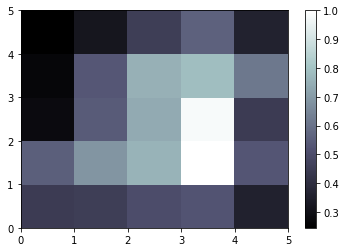

In [ ]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

show()

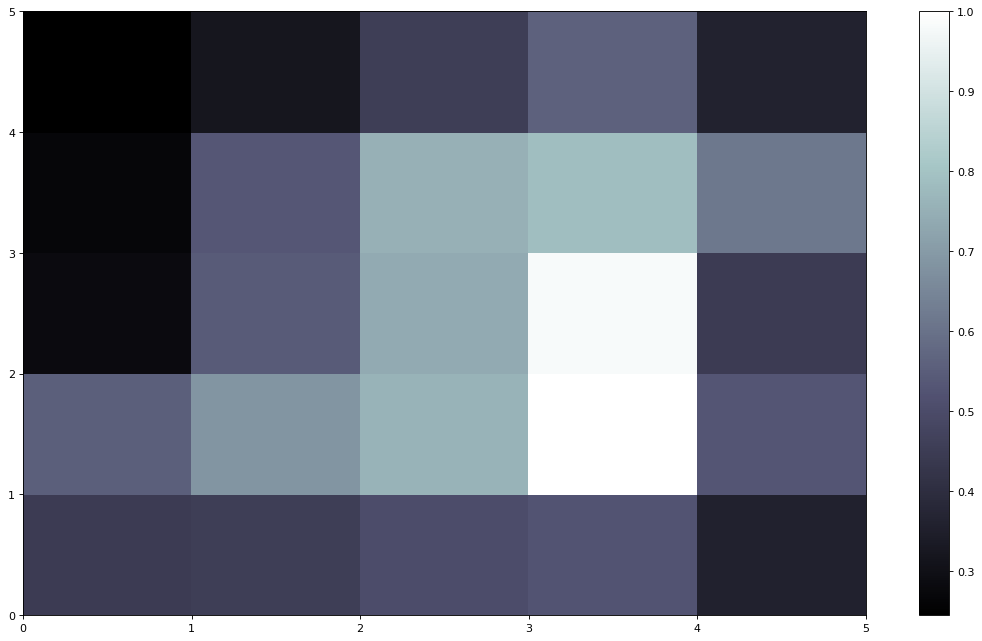

In [ ]:
# 5*5 map 을 평면 위에 표현
# node 에 최근접한 data point 들이 많을수록 짙게, 적을수록 옅게 표시 (Map 의 진한 부분엔 데이터들이 모여있다는 뜻)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show

plt.figure(figsize=(17, 10), dpi= 80, facecolor='w', edgecolor='k') # To make the fig bigger 

pcolor(som.distance_map().T)
# This line finds out the mean inter neuron distance and makes a map based on these distances.
# It makes clusters based on the colours based on the distances. The darker the colour the closer the neurons is to it's neighbourhood.
# The lighter neurons are the outliers and if customers are present in it that means they are fradulent.
colorbar() # This is the legend of the map

In [ ]:
som.distance_map()

array([[0.44674855, 0.55242541, 0.28115982, 0.26841063, 0.24503941],
       [0.45477794, 0.68621307, 0.54460231, 0.53399603, 0.32076084],
       [0.50198571, 0.75996017, 0.73795892, 0.75235357, 0.45585258],
       [0.52461688, 1.        , 0.9820253 , 0.78505683, 0.55987441],
       [0.35834389, 0.53047062, 0.44735005, 0.61396289, 0.36212404]])

In [ ]:
pd.DataFrame(som.distance_map())

,0,1,2,3,4
0,0.446749,0.552425,0.281160,0.268411,0.245039
1,0.454778,0.686213,0.544602,0.533996,0.320761
2,0.501986,0.759960,0.737959,0.752354,0.455853
3,0.524617,1.000000,0.982025,0.785057,0.559874
4,0.358344,0.530471,0.447350,0.613963,0.362124


In [ ]:
som.win_map(X)

defaultdict(list,
            {(0,
              1): [array([0.12526316, 0.40928571, 0.23076923, 0.375     , 0.05561404,
                     0.05      , 0.01212   ]), array([0.11909774, 0.41071429, 0.30769231, 0.25      , 0.        ,
                     0.        , 0.        ]), array([0.05518797, 0.23214286, 0.15384615, 0.375     , 0.00438596,
                     0.03      , 0.001     ]), array([0.11654135, 0.41071429, 0.15384615, 0.375     , 0.01754386,
                     0.05      , 0.00068   ]), array([0.07263158, 0.35714286, 0.07692308, 0.375     , 0.0145614 ,
                     0.04      , 0.00042   ]), array([0.2243609 , 0.51785714, 0.07692308, 0.375     , 0.00438596,
                     0.        , 0.00286   ]), array([7.89473684e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
                     0.00000000e+00, 2.25000000e-02, 1.00000000e-05]), array([7.63909774e-02, 1.26428571e-01, 0.00000000e+00, 0.00000000e+00,
                     0.00000000e+00, 9.00000000e-

## y(target)값이 있는 경우 다음의 시각화도 가능

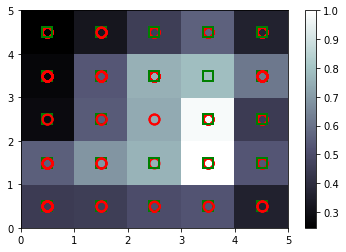

In [ ]:
# y값도 표현 (카드발급 승인 여부: y=0 -> 빨간 동그라미 o, y=1 -> 초록 네모 square)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

참고 (ANN):

https://onesixx.com/optimizer-loss-metrics/

https://keras.io/ko/metrics/

https://talkingaboutme.tistory.com/entry/DL-%ED%95%B4%EB%B3%B4%EB%A9%B4%EC%84%9C-%EB%B0%B0%EC%9A%B0%EB%8A%94-%EB%94%A5%EB%9F%AC%EB%8B%9D-ANN-%EA%B5%AC%ED%98%84-3

https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/

https://han-py.tistory.com/207

https://jackyoon5737.tistory.com/32

https://gomguard.tistory.com/187

https://blog.naver.com/qbxlvnf11/221449297033

https://wikidocs.net/32105

http://blog.naver.com/shwotjd14/221458224334

https://bioinformaticsandme.tistory.com/241

https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-4-%EC%98%81%ED%99%94-%EB%A6%AC%EB%B7%B0-%EB%B6%84%EB%A5%98-%EC%9D%B4%EC%A7%84-%EB%B6%84%EB%A5%98-%EC%98%88%EC%A0%9C/

https://codetorial.net/tensorflow/get_output_of_neuron_layers.html

https://codetorial.net/tensorflow/visualize_model.html

https://codetorial.net/tensorflow/visualize_training_history.html




https://wikidocs.net/44766

https://gooopy.tistory.com/80

https://codetorial.net/tensorflow/classifying_the_cats_and_dogs.html

https://ssongnote.tistory.com/10

- RBF
https://www.python2.net/questions-379561.htm

참고 (SOM):

https://pypi.org/project/sklearn-som/

https://github.com/rileypsmith/sklearn-som/blob/main/example/example.py

https://sklearn-som.readthedocs.io/en/latest/





https://www.infoking.site/37

http://jaynewho.com/post/7

https://blog.naver.com/slykid/221970736285

https://lovit.github.io/visualization/2019/12/02/som_part1/





https://github.com/samarthjsh300/Self-Organizing-Maps



https://www.kaggle.com/pranayprasad/credit-card-fraud-detection

https://www.kaggle.com/monntosky/self-organising-maps

https://rubikscode.net/2018/09/24/credit-card-fraud-detection-using-self-organizing-maps-and-python/

https://colab.research.google.com/github/taruma/hidrokit-nb/blob/master/notebook/taruma_udemy_som_megacasestudy.ipynb




https://github.com/JustGlowing/minisom



https://github.com/Kursula/Kohonen_SOM